<a href="https://colab.research.google.com/github/Roozbeh-Bazargani/CPSC540-project/blob/main/evaluation/CPSC540_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
root_path = 'drive/MyDrive/test_results'
test_labels = np.load(root_path+'/source_label_DANN_block1_balanced_without_aug.npy')
pred_probs = np.load(root_path+'/source_pred_DANN_block1_balanced_without_aug.npy')

In [63]:
print(test_labels.shape)
# Binarize the output
test_labels = label_binarize(test_labels, classes=[0, 1, 2, 3])
print(test_labels.shape)
test_labels[:20]

(797,)
(797, 4)


array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [64]:
print(pred_probs.shape)
pred_probs[:20]

(797, 4)


array([[0.00605339, 0.0139083 , 0.83905596, 0.14098234],
       [0.02761217, 0.1822711 , 0.2886563 , 0.50146043],
       [0.01771932, 0.05047121, 0.5169884 , 0.41482112],
       [0.05952263, 0.37801832, 0.15468737, 0.40777168],
       [0.01810845, 0.22609556, 0.7344006 , 0.02139541],
       [0.04467945, 0.25654304, 0.62726974, 0.07150771],
       [0.04340188, 0.2454114 , 0.45170742, 0.25947934],
       [0.01721721, 0.30606765, 0.6278995 , 0.04881566],
       [0.01229911, 0.00891534, 0.97236484, 0.00642066],
       [0.01112814, 0.23351893, 0.6229302 , 0.13242263],
       [0.01518725, 0.02276124, 0.9469575 , 0.01509396],
       [0.34971476, 0.36921182, 0.1846781 , 0.09639533],
       [0.00786278, 0.00452402, 0.98354185, 0.00407138],
       [0.22431833, 0.25203708, 0.43906608, 0.08457849],
       [0.02466209, 0.12210217, 0.48604885, 0.36718702],
       [0.09349825, 0.647682  , 0.17357922, 0.08524051],
       [0.06492303, 0.06912061, 0.4116004 , 0.45435598],
       [0.01473639, 0.23099579,

In [65]:
n_classes = len(test_labels[0])
n_classes

4

# Classification Report

In [66]:
print("ROC for 4 classes:")

pred_labels = np.array([np.argmax(d) for d in pred_probs])
# Binarize the output
pred_labels = label_binarize(pred_labels, classes=[0, 1, 2, 3])
print(pred_labels.shape)
pred_labels[:30]

print(classification_report(test_labels, pred_labels))

ROC for 4 classes:
(797, 4)
              precision    recall  f1-score   support

           0       0.76      0.22      0.34        59
           1       0.62      0.46      0.53       188
           2       0.67      0.75      0.71       411
           3       0.52      0.68      0.59       139

   micro avg       0.63      0.63      0.63       797
   macro avg       0.64      0.53      0.54       797
weighted avg       0.64      0.63      0.62       797
 samples avg       0.63      0.63      0.63       797



# ROC & AUC

In [67]:
roc_auc_score(test_labels, pred_probs, average ='macro', multi_class='ovr')

0.8448197654279194

In [68]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

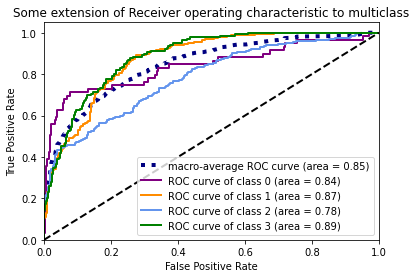

In [69]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = np.array(["purple", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()